In [17]:
import pandas as pd

# Load the 2020 dataset
url_2020 = 'https://drive.google.com/uc?id=1SOe9b4VJ1FCtDVgZ2T8d00-jTw2Kux1i'
df_2020 = pd.read_csv(url_2020, skiprows=[0])

# Print column names and the first few rows to inspect
print("2020 Dataset Columns:")
print(df_2020.columns)
print(df_2020.head())

# Load the 2021 dataset
url_2021 = 'https://drive.google.com/uc?id=1aYmBf9il2dWA-EROvbYRCZ1rU2t7JwvJ'
df_2021 = pd.read_csv(url_2021, skiprows=[0])

# Print column names and the first few rows to inspect
print("2021 Dataset Columns:")
print(df_2021.columns)
print(df_2021.head())


2020 Dataset Columns:
Index(['Date', 'Time', 'Nitrogen dioxide', 'Status'], dtype='object')
         Date  Time Nitrogen dioxide   Status
0  01/01/2020  1:00         41.07113  V µg/m³
1  01/01/2020  2:00          38.9604  V µg/m³
2  01/01/2020  3:00         35.12313  V µg/m³
3  01/01/2020  4:00         35.85312  V µg/m³
4  01/01/2020  5:00         32.10503  V µg/m³
2021 Dataset Columns:
Index(['Date', 'Time', 'Nitrogen dioxide', 'Status'], dtype='object')
         Date   Time Nitrogen dioxide   Status
0  01/01/2021  01:00         16.58269  V µg/m³
1  01/01/2021  02:00         14.00478  V µg/m³
2  01/01/2021  03:00         15.35208  V µg/m³
3  01/01/2021  04:00         13.49688  V µg/m³
4  01/01/2021  05:00         12.47511  V µg/m³


In [49]:
import pandas as pd

def clean_and_wrangling_data(df):
    # Make a copy of the DataFrame to avoid SettingWithCopyWarning
    df = df.copy()
    
    # Convert the 'Date' column to datetime format
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    
    # Remove rows where 'Date' is NaT
    df = df.dropna(subset=['Date'])
    
    # Remove rows where Nitrogen dioxide levels are 'nodata'
    df = df[df['Nitrogen dioxide'].str.lower() != 'nodata']
    
    # Convert Nitrogen dioxide levels to float
    df['Nitrogen dioxide'] = pd.to_numeric(df['Nitrogen dioxide'], errors='coerce')
    
    # Remove rows where 'Nitrogen dioxide' is NaN
    df = df.dropna(subset=['Nitrogen dioxide'])
    
    # Sort by Nitrogen dioxide level
    df = df.sort_values(by='Nitrogen dioxide')
    
    # Create a new column for 'Weekdays' with Monday as 1 and Sunday as 7
    df['Weekdays'] = df['Date'].dt.weekday + 1
    df['Weekdays'] = df['Weekdays'].apply(lambda x: 7 if x == 0 else x)
    
    # Rename the column 'Nitrogen dioxide' to 'NO2 Level (V ug/m2)'
    df.rename(columns={'Nitrogen dioxide': 'NO2 Level (V ug/m2)'}, inplace=True)
    
    # Remove the 'Status' column if it exists
    if 'Status' in df.columns:
        df.drop(columns=['Status'], inplace=True)
    
    return df

# Load the 2020 dataset
url_2020 = 'https://drive.google.com/uc?id=1SOe9b4VJ1FCtDVgZ2T8d00-jTw2Kux1i'
df_2020 = pd.read_csv(url_2020, skiprows=[0])

# Apply the cleaning and wrangling function to the 2020 dataset
df_2020_cleaned = clean_and_wrangling_data(df_2020)

# Load the 2021 dataset
url_2021 = 'https://drive.google.com/uc?id=1aYmBf9il2dWA-EROvbYRCZ1rU2t7JwvJ'
df_2021 = pd.read_csv(url_2021, skiprows=[0])

# Apply the cleaning and wrangling function to the 2021 dataset
df_2021_cleaned = clean_and_wrangling_data(df_2021)

# Print cleaned datasets
print("Cleaned 2020 Dataset:")
print(df_2020_cleaned.head())

print("Cleaned 2021 Dataset:")
print(df_2021_cleaned.head())


Cleaned 2020 Dataset:
           Date  Time  NO2 Level (V ug/m2)  Weekdays
4489 2020-06-07  2:00              0.58930         7
4490 2020-06-07  3:00              0.69317         7
4466 2020-05-07  3:00              0.75605         4
4440 2020-04-07  1:00              0.75690         2
7345 2020-02-11  2:00              0.82169         2
Cleaned 2021 Dataset:
           Date   Time  NO2 Level (V ug/m2)  Weekdays
6674 2021-06-10  03:00             -0.31174         4
6673 2021-06-10  02:00              0.37868         4
6649 2021-05-10  02:00              0.77934         1
6672 2021-06-10  01:00              0.78667         4
6650 2021-05-10  03:00              0.86015         1


In [107]:
import pandas as pd

def clean_and_wrangling_data(df):
    # Make a copy of the DataFrame to avoid SettingWithCopyWarning
    df = df.copy()
    
    # Convert the 'Date' column to datetime format
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    
    # Remove rows where 'Date' is NaT
    df = df.dropna(subset=['Date'])
    
    # Remove rows where Nitrogen dioxide levels are 'nodata'
    df = df[df['Nitrogen dioxide'].str.lower() != 'nodata']
    
    # Convert Nitrogen dioxide levels to float
    df['Nitrogen dioxide'] = pd.to_numeric(df['Nitrogen dioxide'], errors='coerce')
    
    # Remove rows where 'Nitrogen dioxide' is NaN
    df = df.dropna(subset=['Nitrogen dioxide'])
    
    # Sort by Nitrogen dioxide level
    df = df.sort_values(by='Nitrogen dioxide')
    
    # Create a new column for 'Weekdays' with Monday as 1 and Sunday as 7
    df['Weekdays'] = df['Date'].dt.weekday + 1
    
    # Rename the column 'Nitrogen dioxide' to 'NO2 Level (V ug/m2)'
    df.rename(columns={'Nitrogen dioxide': 'NO2 Level (V ug/m2)'}, inplace=True)
    
    # Remove the 'Status' column if it exists
    if 'Status' in df.columns:
        df.drop(columns=['Status'], inplace=True)
    
    return df

# Define the mapping from numeric weekday values to weekday names
weekday_mapping = {
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday',
    7: 'Sunday'
}

# Load and clean datasets
url_2020 = 'https://drive.google.com/uc?id=1SOe9b4VJ1FCtDVgZ2T8d00-jTw2Kux1i'
df_2020 = pd.read_csv(url_2020, skiprows=[0])
df_2020_cleaned = clean_and_wrangling_data(df_2020)

url_2021 = 'https://drive.google.com/uc?id=1aYmBf9il2dWA-EROvbYRCZ1rU2t7JwvJ'
df_2021 = pd.read_csv(url_2021, skiprows=[0])
df_2021_cleaned = clean_and_wrangling_data(df_2021)

# Print sample rows from cleaned datasets
print("Cleaned 2020 Dataset:")
print(df_2020_cleaned.head())  # Print first few rows of 2020 dataset

print("\nCleaned 2021 Dataset:")
print(df_2021_cleaned.head())  # Print first few rows of 2021 dataset

# Concatenate the datasets for 2020 and 2021
df_combined = pd.concat([df_2020_cleaned, df_2021_cleaned], ignore_index=True)

# Replace numeric weekdays with their names
df_combined['Weekdays'] = df_combined['Weekdays'].map(weekday_mapping)

# Group by 'Weekdays' and show summary statistics
summary_statistics = df_combined.groupby('Weekdays').agg({
    'NO2 Level (V ug/m2)': ['mean', 'std', 'min', 'max', 'count']
})

# Print the summary statistics
print("\nSummary Statistics by Day of the Week:")
print(summary_statistics)


Cleaned 2020 Dataset:
           Date  Time  NO2 Level (V ug/m2)  Weekdays
4489 2020-06-07  2:00              0.58930         7
4490 2020-06-07  3:00              0.69317         7
4466 2020-05-07  3:00              0.75605         4
4440 2020-04-07  1:00              0.75690         2
7345 2020-02-11  2:00              0.82169         2

Cleaned 2021 Dataset:
           Date   Time  NO2 Level (V ug/m2)  Weekdays
6674 2021-06-10  03:00             -0.31174         4
6673 2021-06-10  02:00              0.37868         4
6649 2021-05-10  02:00              0.77934         1
6672 2021-06-10  01:00              0.78667         4
6650 2021-05-10  03:00              0.86015         1

Summary Statistics by Day of the Week:
          NO2 Level (V ug/m2)                                    
                         mean        std      min       max count
Weekdays                                                         
Friday              19.554283  12.186478  1.68469  64.36471  1006
Monday   

Cleaned 2020 Dataset:
           Date  Time  NO2 Level (V ug/m2)  Weekdays
4489 2020-06-07  2:00              0.58930         7
4490 2020-06-07  3:00              0.69317         7
4466 2020-05-07  3:00              0.75605         4
4440 2020-04-07  1:00              0.75690         2
7345 2020-02-11  2:00              0.82169         2

Cleaned 2021 Dataset:
           Date   Time  NO2 Level (V ug/m2)  Weekdays
6674 2021-06-10  03:00             -0.31174         4
6673 2021-06-10  02:00              0.37868         4
6649 2021-05-10  02:00              0.77934         1
6672 2021-06-10  01:00              0.78667         4
6650 2021-05-10  03:00              0.86015         1

Summary Statistics by Day of the Week:
          NO2 Level (V ug/m2)                                    
                         mean        std      min       max count
Weekdays                                                         
Monday              17.238626  12.627666  0.77934  87.10202   957
Tuesday  

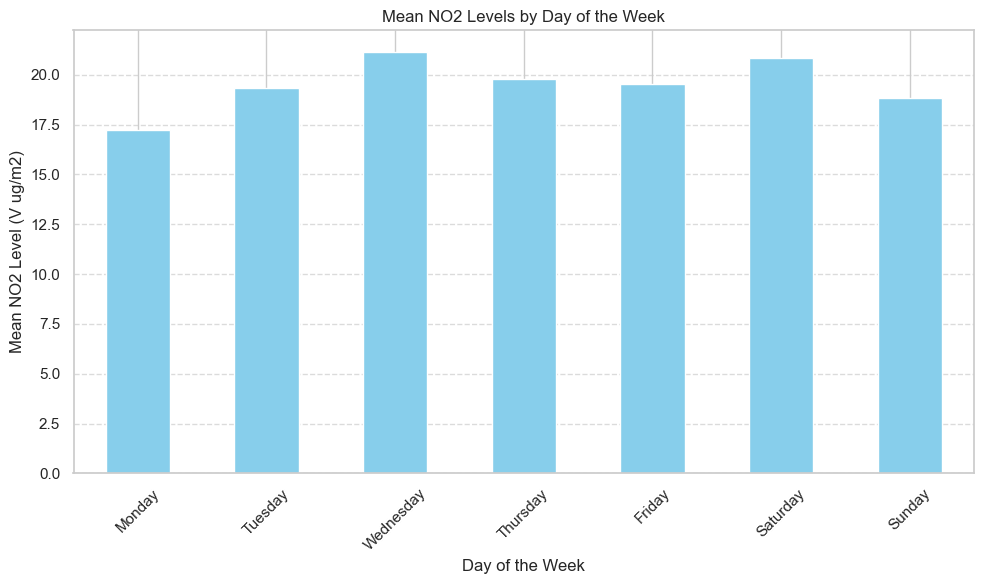

<Figure size 1200x800 with 0 Axes>

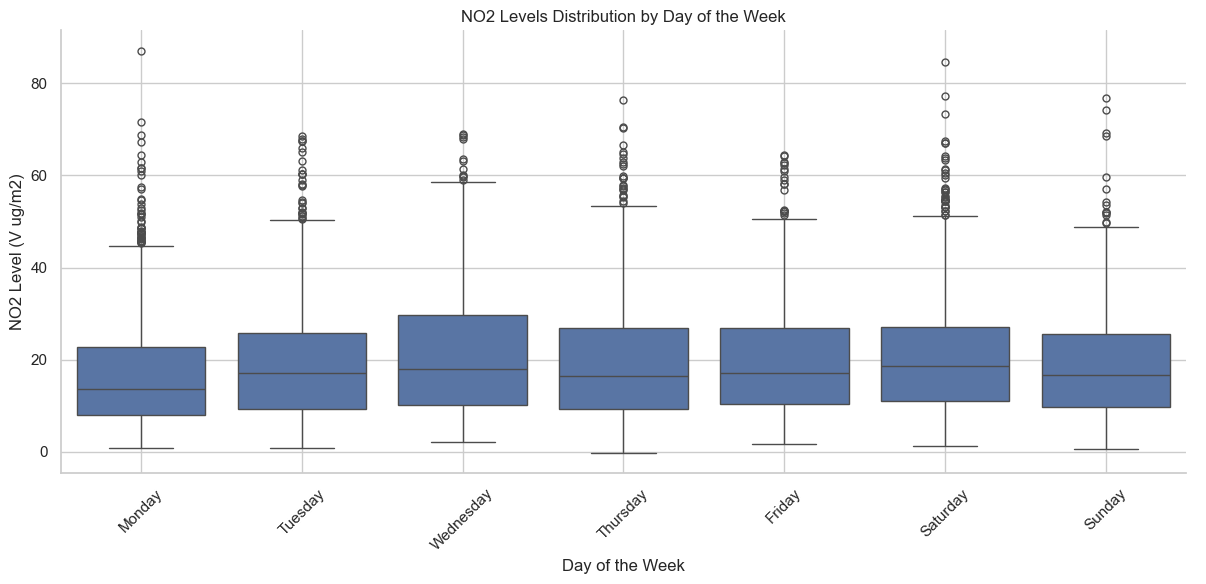

In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def clean_and_wrangling_data(df):
    # Make a copy of the DataFrame to avoid SettingWithCopyWarning
    df = df.copy()
    
    # Convert the 'Date' column to datetime format
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    
    # Remove rows where 'Date' is NaT
    df = df.dropna(subset=['Date'])
    
    # Remove rows where Nitrogen dioxide levels are 'nodata'
    df = df[df['Nitrogen dioxide'].str.lower() != 'nodata']
    
    # Convert Nitrogen dioxide levels to float
    df['Nitrogen dioxide'] = pd.to_numeric(df['Nitrogen dioxide'], errors='coerce')
    
    # Remove rows where 'Nitrogen dioxide' is NaN
    df = df.dropna(subset=['Nitrogen dioxide'])
    
    # Sort by Nitrogen dioxide level
    df = df.sort_values(by='Nitrogen dioxide')
    
    # Create a new column for 'Weekdays' with Monday as 1 and Sunday as 7
    df['Weekdays'] = df['Date'].dt.weekday + 1
    
    # Rename the column 'Nitrogen dioxide' to 'NO2 Level (V ug/m2)'
    df.rename(columns={'Nitrogen dioxide': 'NO2 Level (V ug/m2)'}, inplace=True)
    
    # Remove the 'Status' column if it exists
    if 'Status' in df.columns:
        df.drop(columns=['Status'], inplace=True)
    
    return df

# Define the mapping from numeric weekday values to weekday names
weekday_mapping = {
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday',
    7: 'Sunday'
}

# Load and clean datasets
url_2020 = 'https://drive.google.com/uc?id=1SOe9b4VJ1FCtDVgZ2T8d00-jTw2Kux1i'
df_2020 = pd.read_csv(url_2020, skiprows=[0])
df_2020_cleaned = clean_and_wrangling_data(df_2020)

url_2021 = 'https://drive.google.com/uc?id=1aYmBf9il2dWA-EROvbYRCZ1rU2t7JwvJ'
df_2021 = pd.read_csv(url_2021, skiprows=[0])
df_2021_cleaned = clean_and_wrangling_data(df_2021)

# Print sample rows from cleaned datasets
print("Cleaned 2020 Dataset:")
print(df_2020_cleaned.head())  # Print first few rows of 2020 dataset

print("\nCleaned 2021 Dataset:")
print(df_2021_cleaned.head())  # Print first few rows of 2021 dataset

# Concatenate the datasets for 2020 and 2021
df_combined = pd.concat([df_2020_cleaned, df_2021_cleaned], ignore_index=True)

# Replace numeric weekdays with their names and set ordered categorical type
df_combined['Weekdays'] = df_combined['Weekdays'].map(weekday_mapping)
df_combined['Weekdays'] = pd.Categorical(df_combined['Weekdays'], categories=list(weekday_mapping.values()), ordered=True)

# Group by 'Weekdays' and show summary statistics
summary_statistics = df_combined.groupby('Weekdays', observed=True).agg({
    'NO2 Level (V ug/m2)': ['mean', 'std', 'min', 'max', 'count']
})

# Print the summary statistics
print("\nSummary Statistics by Day of the Week:")
print(summary_statistics)

# Visualizations

# Set up the plotting style
sns.set(style="whitegrid")

# Bar plot of mean NO2 levels by weekday
plt.figure(figsize=(10, 6))
mean_no2 = summary_statistics['NO2 Level (V ug/m2)']['mean']
mean_no2.plot(kind='bar', color='skyblue')
plt.title('Mean NO2 Levels by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Mean NO2 Level (V ug/m2)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Catplot of NO2 levels by weekday
plt.figure(figsize=(12, 8))
sns.catplot(
    x='Weekdays', 
    y='NO2 Level (V ug/m2)', 
    kind='box', 
    data=df_combined, 
    height=6, 
    aspect=2
)
plt.title('NO2 Levels Distribution by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('NO2 Level (V ug/m2)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()
